In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import re
import sklearn.linear_model as lm
import sklearn.ensemble as ens
import sklearn.neural_network as nn

In [2]:
def natural_sort(l):
    def convert(text): return int(text) if text.isdigit() else text.lower()

    def alphanum_key(key): return [convert(c)
                                   for c in re.split('([0-9]+)', key)]
    return sorted(l, key=alphanum_key)

In [178]:
dataset_path = "mtist_datasets"
es_score_path = "mtist_datasets/output_geom/inference_result_infer_from_did_elasticnet_cv_geom_mean"
n_dset = len([i for i in os.listdir(es_score_path) if i.split("_")[0]=="inferred"])

dataset_files = [i for i in os.listdir(dataset_path) if i.split("_")[0]=="dataset" and int(re.findall("_([0-9]+).csv", i)[0]) < n_dset]
dataset_files = natural_sort(dataset_files)

In [179]:
es_scores = pd.read_csv(f"{es_score_path}/es_scores.csv", index_col=0)
new_es_scores = pd.read_csv(f"{es_score_path}/new_es_scores.csv", index_col=0)

In [246]:
np.diff(df["time"])[np.diff(df["time"])>=0].mean()

1.2462857142857147

In [304]:
df

,time,species_0,species_1,species_2,ground_truth,timeseries_id,noise,n_species,did,seq_depth,n_timeseries,n_timepoints,sampling_scheme,dt
0,6.157576,3.659421,0.000000,0.147317,3_sp_gt_3,36656,0.1,3,1133,low,50,15,seq,1.246286
1,7.369697,3.715321,0.000000,0.417791,3_sp_gt_3,36656,0.1,3,1133,low,50,15,seq,1.246286
2,8.581818,2.229118,0.000000,0.951733,3_sp_gt_3,36656,0.1,3,1133,low,50,15,seq,1.246286
3,10.096970,2.704753,0.000000,0.992052,3_sp_gt_3,36656,0.1,3,1133,low,50,15,seq,1.246286
4,11.309091,2.982814,0.000000,1.117757,3_sp_gt_3,36656,0.1,3,1133,low,50,15,seq,1.246286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
745,12.521212,0.784149,1.327693,0.880136,3_sp_gt_3,12733201,0.1,3,1133,low,50,15,seq,1.246286
746,13.733333,0.855959,0.717715,0.660101,3_sp_gt_3,12733201,0.1,3,1133,low,50,15,seq,1.246286
747,14.945455,1.520639,0.607437,0.682633,3_sp_gt_3,12733201,0.1,3,1133,low,50,15,seq,1.246286
748,16.157576,1.074590,1.233801,1.215241,3_sp_gt_3,12733201,0.1,3,1133,low,50,15,seq,1.246286


In [296]:
dataset_files[-1]

'dataset_1133.csv'

In [305]:
dset

'dataset_1133.csv'

In [307]:
df["sampling_scheme"][0]

'seq'

In [310]:
dset_param_cols = ["n_species", "n_timeseries", "n_timepoints", "noise", "sampling_scheme", "dt"]
dset_param_vals = []

for dset in dataset_files:
    df = pd.read_csv(f"{dataset_path}/{dset}", index_col=0)
    df["sampling_scheme"] = len(df["sampling_scheme"][0])
    df["dt"] = np.diff(df["time"])[np.diff(df["time"])>=0].mean()
    dset_param_vals.append(np.unique(df[dset_param_cols], axis=0))

In [311]:
df = pd.DataFrame(np.concatenate(dset_param_vals), columns=dset_param_cols)
df[["es_score_raw", "es_score_floored"]] = es_scores
df[["new_es_score_raw", "new_es_score_floored"]] = new_es_scores

df

,n_species,n_timeseries,n_timepoints,noise,sampling_scheme,dt,es_score_raw,es_score_floored,new_es_score_raw,new_es_score_floored
0,100.0,5.0,5.0,0.01,4.0,7.524242,0.510356,0.505299,0.667600,0.704200
1,100.0,5.0,10.0,0.01,4.0,3.344108,0.514451,0.509875,0.697700,0.756400
2,100.0,5.0,15.0,0.01,4.0,2.149784,0.512042,0.513487,0.695200,0.788000
3,100.0,5.0,5.0,0.01,6.0,4.939394,0.507225,0.501445,0.668700,0.695800
4,100.0,5.0,10.0,0.01,6.0,3.021145,0.506744,0.502890,0.672300,0.718400
...,...,...,...,...,...,...,...,...,...,...
1129,3.0,50.0,10.0,0.10,6.0,2.975434,0.888889,0.833333,0.888889,0.666667
1130,3.0,50.0,15.0,0.10,6.0,2.040952,1.000000,1.000000,1.000000,1.000000
1131,3.0,50.0,5.0,0.10,3.0,1.305245,1.000000,1.000000,1.000000,1.000000
1132,3.0,50.0,10.0,0.10,3.0,1.248350,1.000000,1.000000,1.000000,1.000000


In [314]:
n_sp = 10.
df_n_sp = df[df.n_species==n_sp]
feat = df_n_sp.iloc[:,1:4].values
label = df_n_sp["es_score_raw"].values
new_label = df_n_sp["new_es_score_raw"].values

lr = lm.LinearRegression()
lr.fit(feat, label)
lr.score(feat, label)

0.40182819376521994

In [315]:
df["sampling_scheme"].unique()

array([4., 6., 3.])

In [316]:
lr.intercept_, lr.coef_

(0.5417011335825285, array([ 0.00297348,  0.01470715, -0.24209107]))

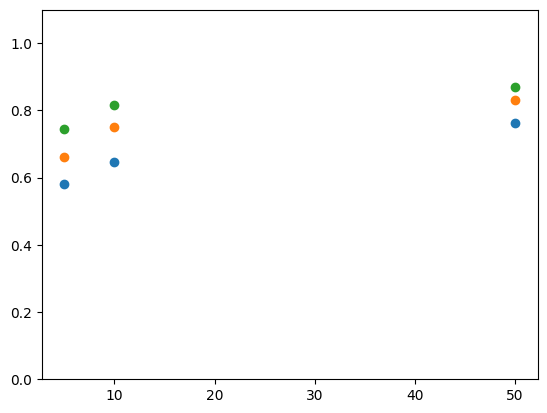

In [317]:
for i, n_ts in enumerate(df["n_timeseries"].unique()):
    for j, n_tp in enumerate(df["n_timepoints"].unique()):
        plt.scatter(n_ts, df_n_sp[(df_n_sp[["n_timepoints", "n_timeseries"]]==[n_tp,n_ts]).all(1).values]["es_score_raw"].values.mean(), c=f"C{j}")
        
plt.ylim(0, 1.1)
plt.show()

In [328]:
df["sampling_scheme"].unique()

array([4., 6., 3.])

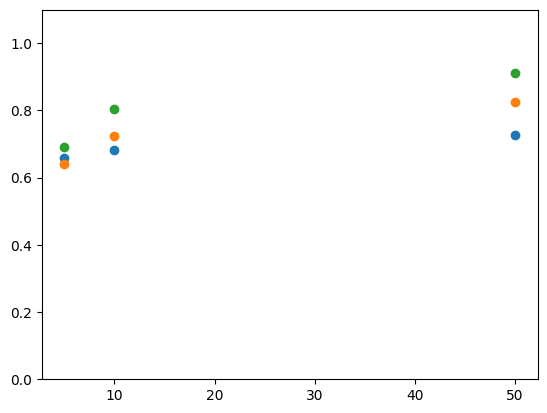

In [318]:
for i, n_ts in enumerate(df["n_timeseries"].unique()):
    for j, n_tp in enumerate(df["sampling_scheme"].unique()):
        plt.scatter(n_ts, df_n_sp[(df_n_sp[["sampling_scheme", "n_timeseries"]]==[n_tp,n_ts]).all(1).values]["es_score_raw"].values.mean(), c=f"C{j}")
        
plt.ylim(0, 1.1)
plt.show()

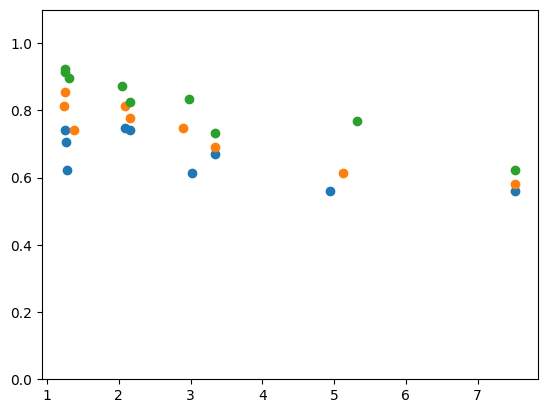

In [335]:
for i, n_ts in enumerate(df["n_timeseries"].unique()):
    for j, n_tp in enumerate(df[df["n_timeseries"]==n_ts]["dt"].unique()):
        plt.scatter(n_tp, df_n_sp[(df_n_sp[["dt", "n_timeseries"]]==[n_tp,n_ts]).all(1).values]["es_score_raw"].values.mean(), c=f"C{i}")
        
plt.ylim(0, 1.1)
plt.show()

In [168]:
lr.score(feat, new_label)

-1.4291614215504196

In [169]:
rfr = ens.RandomForestRegressor()
rfr.fit(feat, new_label)
rfr.score(feat, new_label)

0.3635680949633646

In [170]:
gfr = ens.GradientBoostingRegressor()
gfr.fit(feat, new_label)
gfr.score(feat, new_label)

0.3636336144335647

In [171]:
nnet = nn.MLPRegressor(activation="logistic")
nnet.fit(feat, new_label)
nnet.score(feat, new_label)

0.3503746980161321